# 6. Propriedades de Inércia de Corpos Rígidos
Professor Paulo Victor <br>
E-mail: paulo.gomes@cefet-rj.br <br>
CEFET-RJ Campus Angra dos Reis Sala 6E

O movimento que resulta quando forças atuam em um sistema material não depende somente das forças, mas também da constituição do sistema. Particularmente, a maneira na qual a massa está distribuida no sistema afeta o seu comportamento.

## 6.1 Centro de Massa

O centro de massa de um corpo rígido pode ser obtido por:
$$ \vec{p}{}^{*/O} = \dfrac{1}{m} \int_B \vec{p} dm$$
Ou:
$$ \vec{p}{}^{*/O} = \dfrac{1}{m} \int_B \rho \vec{p} dV$$

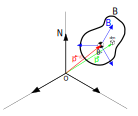

In [1]:
from IPython.display import SVG
SVG('batata04.svg')

Observa-se que os **centros de massas** de várias figuras elementares podem ser obtidos em tabelas. E o centro de massa de figuras complexas podem ser obtidos através da simplificação dessas figuras em uma soma (ou subtração) de figuras elementares, onde são obtidos os centros de massa das figuras elementares que compõem a figura complexa e seu centro de massa é obtido tratando as figuras elementares como partículas.

![](Inercia1.png)

![](Inercia2.png)

## 6.2 Tensor de Inércia de um Corpo Rígido

O **Tensor de Inércia** de um corpo rígido pode ser obtido por:
$$ \underline{I}^{B/O} = \int_{B} \left(p^{2} \underline{1} - \vec{p} \otimes \vec{p} \right)dm $$

Observa-se que os **momentos de inércia** de várias figuras elementares podem ser obtidos em tabelas. E os momentos de inércia de figuras complexas podem ser obtidos através da simplificação dessas figuras em uma soma (ou subtração) de figuras elementares.

![](Inercia3.png)

![](Inercia4.png)

![](Inercia5.png)

![](Inercia6.png)

Caso se necessite expressar o Tensor de Inércia em relação a um ponto diferente do centro de massa, podemos utilizar o teorema dos eixos paralelos:
$$ \underline{I}^{B/O} = \underline{I}^{B/B^*} + \underline{I}^{B^*/O} $$
Ou, escrevendo como vetores de inércia:
$$ \vec{I}{}^{B/O} = \vec{I}{}^{B/B^*} + \vec{I}{}^{B^*/O} $$

### Exemplo 1
Usar o teorema dos eixos paralelos para escrever o tensor de inércia da barra $B$ em relação ao ponto $O$:

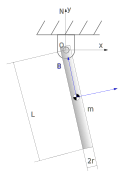

In [2]:
SVG('pend_fis.svg')

In [3]:
import sympy as sy
import sympy.physics.mechanics as me

In [4]:
m,r,L = sy.symbols('m r L')
theta = me.dynamicsymbols('theta')

In [5]:
N = me.ReferenceFrame('N')

In [6]:
B = me.ReferenceFrame('B')
B.orient(N,'Axis',[theta,N.z])

In [7]:
O = me.Point('O')
O.set_vel(N,0)

Vamos definir o vetor posição do centro de massa em relação ao ponto $O$ ,$\vec{p}{}^{CM/O}$, como:

In [8]:
p = -L/2*B.y
p

- L/2*B.y

In [9]:
CM = me.Point('CM')
CM.set_pos(O,p)
CM.set_vel(N,p.dt(N))

**Criando o tensor de inércia do cilindo em relação ao seu centro de massa:** <br>
Para o cilindro temos que: 
$$ I_{x}^{*} = I_{y}^{*} = \dfrac{mr^2}{4} + \dfrac{mL^2}{12} \qquad I_{z}^{*} = \dfrac{mr^2}{2} $$

Usando a tabela de momentos de inércia:

In [10]:
Ix = m*r*2/4 + m*L**2/12
Iz = Ix
Iy = m*r**2/2

In [11]:
I = me.inertia(B,Ix,Iy,Iz)
I

(L**2*m/12 + m*r/2)*(B.x|B.x) + m*r**2/2*(B.y|B.y) + (L**2*m/12 + m*r/2)*(B.z|B.z)

In [12]:
I.to_matrix(B)

Matrix([
[L**2*m/12 + m*r/2,        0,                 0],
[                0, m*r**2/2,                 0],
[                0,        0, L**2*m/12 + m*r/2]])

Podemos resolver esse exemplo no python de dois modos diferentes. Para a primeira maneira, vamos obter o tensor de inércia de um ponto no CM em relação ao ponto O. <br>
Sabemos que:
$$ \underline{I}^{CM/O} = m \left( \left(p^{CM/O} \right)^2 \underline{1} - \vec{p}{}^{CM/O} \otimes \vec{p}{}^{CM/O} \right)$$

In [13]:
I2 = me.inertia_of_point_mass(m, p, B)
I2.to_matrix(B)

Matrix([
[L**2*m/4, 0,        0],
[       0, 0,        0],
[       0, 0, L**2*m/4]])

Podemos somar e subtrair tensores de inércia. Deste modo, resolvemos o exemplo utilizando a equação do teorema dos eixos paralelos. 

In [14]:
I3 = I + I2
I3

(L**2*m/3 + m*r/2)*(B.x|B.x) + m*r**2/2*(B.y|B.y) + (L**2*m/3 + m*r/2)*(B.z|B.z)

In [15]:
I3.to_matrix(B)

Matrix([
[L**2*m/3 + m*r/2,        0,                0],
[               0, m*r**2/2,                0],
[               0,        0, L**2*m/3 + m*r/2]])

No python, podemos definir um corpo rígido da seguinte maneira:<br>
Comando me.RigidBody('B',P,C,M,(I,O))<br>

| Símbolo | Significado |
|---------|-------------|
| B | Nome do corpo |
| P | O ponto que representa o centro de massa |
| C | Sistema de referência fixo no corpo |
| m | Massa do corpo |
| I | Tensor de inércia |
| O | Ponto em que o tensor de inércia está definido |

In [16]:
Pend = me.RigidBody('Pend',CM,B,m,(I,CM))

Resolvendo o nosso exemplo:

In [26]:
Pend.parallel_axis(O)

(L**2*m/3 + m*r/2)*(B.x|B.x) + m*r**2/2*(B.y|B.y) + (L**2*m/3 + m*r/2)*(B.z|B.z)

In [17]:
Pend.parallel_axis(O).to_matrix(B)

Matrix([
[L**2*m/3 + m*r/2,        0,                0],
[               0, m*r**2/2,                0],
[               0,        0, L**2*m/3 + m*r/2]])

### Exemplo 2: 
Obtenha o tensor de inércia do sistema mostrado na figura a seguir.
![](ex6-1.png)

In [18]:
L,R,mcubo,mcilindro = sy.symbols('L R m_{cubo} m_{cilindro}')

In [19]:
Icubo = me.inertia(N,mcubo*L**2/6,mcubo*L**2/6,mcubo*L**2/6)
Icubo

L**2*m_{cubo}/6*(N.x|N.x) + L**2*m_{cubo}/6*(N.y|N.y) + L**2*m_{cubo}/6*(N.z|N.z)

In [20]:
Icubo.to_matrix(N)

Matrix([
[L**2*m_{cubo}/6,               0,               0],
[              0, L**2*m_{cubo}/6,               0],
[              0,               0, L**2*m_{cubo}/6]])

In [21]:
Icilindro = me.inertia(N,mcilindro*R**2/2,mcilindro*(3*R**2 + L**2)/12,mcilindro*(3*R**2 + L**2)/12)
Icilindro.to_matrix(N)

Matrix([
[R**2*m_{cilindro}/2,                               0,                               0],
[                  0, m_{cilindro}*(L**2 + 3*R**2)/12,                               0],
[                  0,                               0, m_{cilindro}*(L**2 + 3*R**2)/12]])

Vetor posição do centro do cubo para o centro do cilindro:

In [22]:
p = (L/2 + R*sy.cos(sy.pi/4))*N.x + (L/2 + R*sy.sin(sy.pi/4))*N.z

Usando o teorema dos eixos paralelos:

In [23]:
Ici2 = Icilindro + me.inertia_of_point_mass(mcilindro,p,N)
Ici2.to_matrix(N)

Matrix([
[R**2*m_{cilindro}/2 + m_{cilindro}*(L/2 + sqrt(2)*R/2)**2,                                                                       0,                                  -m_{cilindro}*(L/2 + sqrt(2)*R/2)**2],
[                                                        0, 2*m_{cilindro}*(L/2 + sqrt(2)*R/2)**2 + m_{cilindro}*(L**2 + 3*R**2)/12,                                                                     0],
[                     -m_{cilindro}*(L/2 + sqrt(2)*R/2)**2,                                                                       0, m_{cilindro}*(L/2 + sqrt(2)*R/2)**2 + m_{cilindro}*(L**2 + 3*R**2)/12]])

In [29]:
Isis2 = Icubo + Ici2
Isis2.to_matrix(N)

Matrix([
[L**2*m_{cubo}/6 + R**2*m_{cilindro}/2 + m_{cilindro}*(L/2 + sqrt(2)*R/2)**2,                                                                                         0,                                                    -m_{cilindro}*(L/2 + sqrt(2)*R/2)**2],
[                                                                          0, L**2*m_{cubo}/6 + 2*m_{cilindro}*(L/2 + sqrt(2)*R/2)**2 + m_{cilindro}*(L**2 + 3*R**2)/12,                                                                                       0],
[                                       -m_{cilindro}*(L/2 + sqrt(2)*R/2)**2,                                                                                         0, L**2*m_{cubo}/6 + m_{cilindro}*(L/2 + sqrt(2)*R/2)**2 + m_{cilindro}*(L**2 + 3*R**2)/12]])

O centro de massa desses sistema será:

In [24]:
cm_cubo = L/2*N.x + L/2*N.y + L/2*N.z
cm_cilindro = (L + R*sy.cos(sy.pi/4))*N.x + L/2*N.y + (L + R*sy.cos(sy.pi/4))*N.z

In [25]:
cm_sis2 = (cm_cubo*mcubo + cm_cilindro*mcilindro)/(mcubo+mcilindro)
cm_sis2

(L*m_{cubo}/2 + m_{cilindro}*(L + sqrt(2)*R/2))/(m_{cilindro} + m_{cubo})*N.x + (L*m_{cilindro}/2 + L*m_{cubo}/2)/(m_{cilindro} + m_{cubo})*N.y + (L*m_{cubo}/2 + m_{cilindro}*(L + sqrt(2)*R/2))/(m_{cilindro} + m_{cubo})*N.z

[Voltar para o capítulo anterior](Din5.ipynb)     $\qquad$   [Avançar para o próximo capítulo](Din7.ipynb)